In [4]:
import click
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import pandas as pd
import os
import shutil
import joblib
import json

In [2]:
def main(path):
    splitsort = []
    smaller = []
    for i in glob(os.path.join(path, '*log.csv')):
        splitname = os.path.basename(i).split('_')
        if len(splitname)==3:
            splitsort.append((int(splitname[0]),i))
        else:
            smaller.append(i)

    loss = []
    for i in list(np.array(sorted(splitsort))[:,1])+smaller:
        print(f"Processing file: {i}")
        print(i)
        loss.append(split(i)[:, 1])  # Get only the loss values (assumed to be in the second column)
    plt.plot(np.hstack(loss))
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.show()

def split(path):
    """Helper function to read CSV file and extract required columns."""
    with open(path, 'r') as f:
        save = pd.read_csv(path)[['Iteration','Cost']].dropna()
    return np.array(save)

In [19]:
# for i in glob('BSE-calc-test/16qubit/*/*results.json'):
#     with open(i,'r') as f:
#         topresult = json.load(f)
#     finpath = os.path.join(os.path.dirname(os.path.dirname(i)),'finished',os.path.basename(os.path.dirname(i)),os.path.basename(os.path.dirname(i))+'_results.json')
#     if os.path.exists(finpath):
#         with open(finpath,'r') as g:
#             finishedresult=json.load(g)
#         print(topresult['R2_train'],finishedresult['R2_train'])

In [23]:
# for i in glob('BSE-calc-test/16qubit/*/*results.json'):
for i in glob('function-calc-test/sixteenqubit_test/lin16qubit/*/model_log.csv'):
    print(os.path.dirname(i))
    print()
    main(os.path.dirname(i))

function-calc-test/sixteenqubit_test/lin16qubit/A1_Efficient-CRX



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

function-calc-test/fivequbit_tests/lin5qubit/A1_Efficient-CRX/model_log.csv
function-calc-test/fivequbit_tests/lin5qubit/A1-A1-CNOT_Full-Pauli-CRZ/model_log.csv
function-calc-test/fivequbit_tests/lin5qubit/A1-A1-CZ_ESU2/model_log.csv
function-calc-test/fivequbit_tests/lin5qubit/A1-A1-CZ_HWE-CNOT/model_log.csv
function-calc-test/fivequbit_tests/lin5qubit/A1-A1-CZ_Full-Pauli-CRZ/model_log.csv
function-calc-test/fivequbit_tests/lin5qubit/A1-A1-CNOT_Efficient-CRZ/model_log.csv
function-calc-test/fivequbit_tests/lin5qubit/A1-A1-CNOT_HWE-CNOT/model_log.csv
function-calc-test/fivequbit_tests/lin5qubit/A1-A1-CNOT_Modified-Pauli-CRX/model_log.csv
function-calc-test/fivequbit_tests/lin5qubit/A1-A1-CZ_Modified-Pauli-CRX/model_log.csv
function-calc-test/fivequbit_tests/lin5qubit/A1-A1-CZ_Efficient-CRX/model_log.csv
function-calc-test/fivequbit_tests/lin5qubit/A1-A1-CZ_Full-CRZ/model_log.csv
function-calc-test/fivequbit_tests/lin5qubit/A1_Full-CRZ/model_log.csv
function-calc-test/fivequbit_tests/li

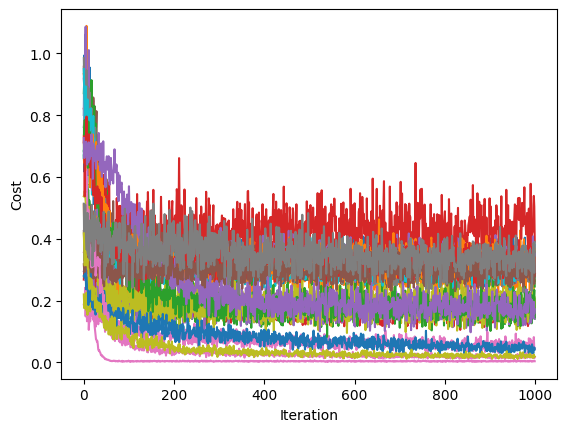

In [84]:
stacked_log=[]
# for i in glob('BSE-calc-test/16qubit/finished/*/model_log.csv'):
for i in glob('function-calc-test/fivequbit_tests/lin5qubit/*/model_log.csv'):
# for i in glob('function-calc-test/sixteenqubit_test/sin16qubit/*/model_log.csv'):    
    df=pd.read_csv(i)[['Iteration','Cost']].dropna()
    if df.shape[0]==1000:
        print(i)
        stacked_log.append(df)    
        sns.lineplot(data=df,x='Iteration',y='Cost')
# plt.xlim(0,1000)
plt.show()
# for i in glob('BSE_RUD_AL_test/16qubit/5_RUD/*/model_log.csv'):
#     df=pd.read_csv(i)[['Iteration','Cost']].dropna()
#     stacked_log.append(df)

(0.0, 1000.0)

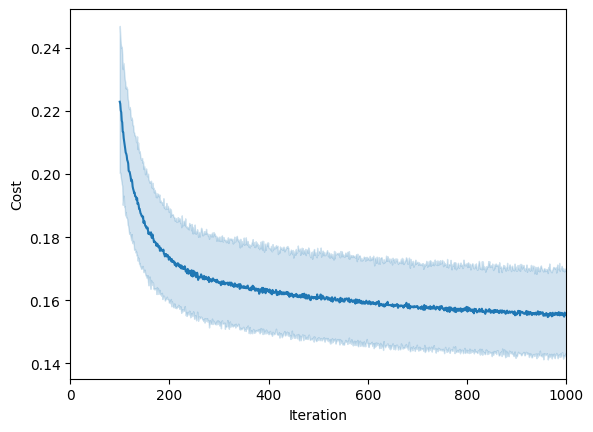

In [5]:
sns.lineplot(data=pd.concat(stacked_log),x='Iteration',y='Cost')
plt.xlim(0,1000)

In [6]:
def main(path):

    with open(path,'r') as f:
        filename=f.readlines()
    
    save=[]
    for i in filename:
        if ':' in i:
            splitf=i.split(',')
            save.append((splitf[1],splitf[2]))
    
    save=np.array(save).astype(float)
    
    plt.plot(save[:,0],save[:,1])
    plt.show()
